In [ ]:
# https://www.analyticsvidhya.com/blog/2019/03/learn-to-use-elmo-to-extract-features-from-text/

https://datahack.analyticsvidhya.com/contest/linguipedia-codefest-natural-language-processing-1/#About

# What is ELMo?

ELMo is a novel way to represent words in vectors or embeddings. These word embeddings are helpful in achieving state-of-the-art (SOTA) results in several NLP tasks:

NLP scientists globally have started using ELMo for various NLP tasks, both in research as well as the industry. You must check out the original ELMo research paper here – https://arxiv.org/pdf/1802.05365.pdf. I don’t usually ask people to read research papers because they can often come across as heavy and complex but I’m making an exception for ELMo. This one is a really cool explanation of how ELMo was designed.

# Understanding how ELMo works

As I mentioned earlier, ELMo word vectors are computed on top of a two-layer bidirectional language model (biLM). This biLM model has two layers stacked together. Each layer has 2 passes — forward pass and backward pass

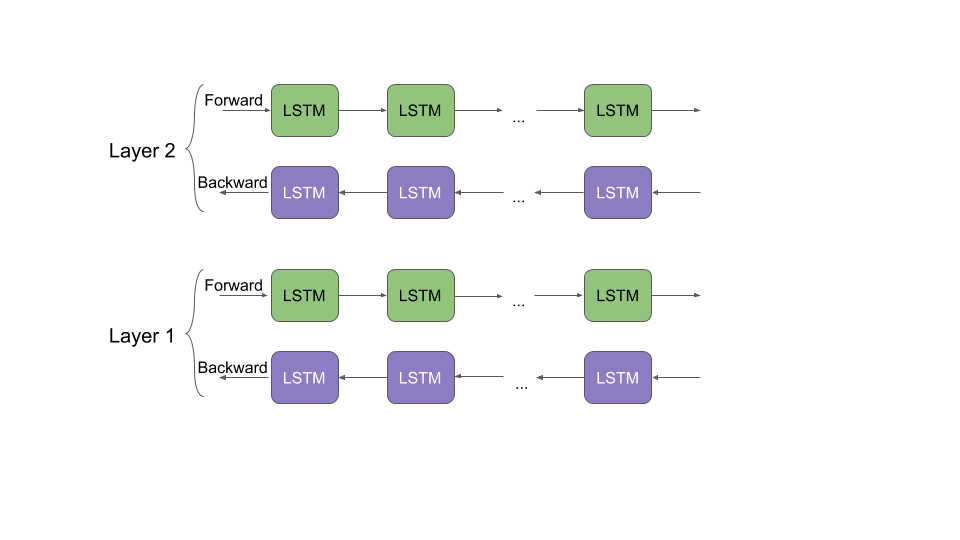

* The architecture above uses a character-level convolutional neural network (CNN) to represent words of a text string into raw word vectors
* These raw word vectors act as inputs to the first layer of biLM
* The forward pass contains information about a certain word and the context (other words) before that word
The backward pass contains information about the word and the context after it
* This pair of information, from the forward and backward pass, forms the intermediate word vectors
* These intermediate word vectors are fed into the next layer of biLM
* The final representation (ELMo) is the weighted sum of the raw word vectors and the 2 intermediate word vectors

As the input to the biLM is computed from characters rather than words, it captures the inner structure of the word. For example, the biLM will be able to figure out that terms like beauty and beautiful are related at some level without even looking at the context they often appear in. 

# How is ELMo different from other word embeddings?

Unlike traditional word embeddings such as word2vec and GLoVe, the ELMo vector assigned to a token or word is actually a function of the entire sentence containing that word. Therefore, the same word can have different word vectors under different contexts.

Suppose we have a couple of sentences:



1.   I read the book yesterday.
2.   Can you read the letter now?



Take a moment to ponder the difference between these two. The verb “read” in the first sentence is in the past tense. And the same verb transforms into present tense in the second sentence. This is a case of Polysemy wherein a word could have multiple meanings or senses.

Language is such a wonderfully complex thing.

Traditional word embeddings come up with the same vector for the word “read” in both the sentences. Hence, the system would fail to distinguish between the polysemous words. These word embeddings just cannot grasp the context in which the word was used.

ELMo word vectors successfully address this issue. ELMo word representations take the entire input sentence into equation for calculating the word embeddings. Hence, the term “read” would have different ELMo vectors under different context.

# Implementation: ELMo for Text Classification in Python


In [ ]:
#https://datahack.analyticsvidhya.com/contest/linguipedia-codefest-natural-language-processing-1/#ProblemStatement

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import spacy
from tqdm import tqdm
import re
import time
import pickle
pd.set_option('display.max_colwidth', 200)

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/MSc DS_NLP/train_2kmZucJ.csv")
test = pd.read_csv("/content/drive/MyDrive/MSc DS_NLP/test_oJQbWVk.csv")


In [ ]:
train['label'].value_counts(normalize = True)

0    0.744192
1    0.255808
Name: label, dtype: float64

In [ ]:
train.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


# Text Cleaning and Preprocessing

In [ ]:
# remove URL's from train and test
train['clean_tweet'] = train['tweet'].apply(lambda x: re.sub(r'http\S+', '', x))

test['clean_tweet'] = test['tweet'].apply(lambda x: re.sub(r'http\S+', '', x))

In [ ]:
# remove punctuation marks
punctuation = '!"#$%&()*+-/:;<=>?@[\\]^_`{|}~'

train['clean_tweet'] = train['clean_tweet'].apply(lambda x: ''.join(ch for ch in x if ch not in set(punctuation)))
test['clean_tweet'] = test['clean_tweet'].apply(lambda x: ''.join(ch for ch in x if ch not in set(punctuation)))

# convert text to lowercase
train['clean_tweet'] = train['clean_tweet'].str.lower()
test['clean_tweet'] = test['clean_tweet'].str.lower()

# remove numbers
train['clean_tweet'] = train['clean_tweet'].str.replace("[0-9]", " ")
test['clean_tweet'] = test['clean_tweet'].str.replace("[0-9]", " ")

# remove whitespaces
train['clean_tweet'] = train['clean_tweet'].apply(lambda x:' '.join(x.split()))
test['clean_tweet'] = test['clean_tweet'].apply(lambda x: ' '.join(x.split()))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]


In [ ]:
# import spaCy's language model
nlp = spacy.load('en', disable=['parser', 'ner'])

# function to lemmatize text
def lemmatization(texts):
    output = []
    for i in texts:
        s = [token.lemma_ for token in nlp(i)]
        output.append(' '.join(s))
    return output

In [ ]:
train['clean_tweet'] = lemmatization(train['clean_tweet'])
test['clean_tweet'] = lemmatization(test['clean_tweet'])

In [ ]:
train.shape

In [ ]:
test.shape

In [ ]:
train.sample(10)

,id,label,tweet,clean_tweet
5766,5767,1,THIS IS FUCKING ABSURD. #HATEAPPLE RT @Androidheadline: HTC Will Pay $6-$8 2 Apple For Every Smartphone Sold http://androidheadlines.com/2012/11/htc-will-pay-6-8-to-apple-for-every-smartphone-sold...,this be fuck absurd . hateapple rt androidheadline htc will pay apple for every smartphone sell … android
2649,2650,1,Any input out there? Tablet? Phone? #hateApple #help #microsoft #surface #fedup http://instagram.com/p/ppJJ5awikr/,any input out there tablet phone hateapple help microsoft surface fedup
1344,1345,0,It's so beautiful!! #gamer thank you #sony #ps3 now it matches my #iphone http://instagr.am/p/U_69owxgv9/,-PRON- be so beautiful gamer thank -PRON- sony ps now -PRON- match -PRON- iphone
4898,4899,0,Hello August !! 2018 goes so fast !! #august #me #boy #selfie #iphonex #beautiful #gay #gayboy #like4like #l4l #f4f #followme #follow #vsco #vscocam #picoftheday … https://www.instagram.com/p/BmBp...,hello august go so fast august -PRON- boy selfie iphonex beautiful gay gayboy like like l l f f followme follow vsco vscocam picoftheday … …
5987,5988,1,"Backing Up iPod Touch I don't want to back up, i just want it sync! gotta be out in 16 mins and lots of songs to be (re)added!","back up ipod touch i do not want to back up , i just want -PRON- sync get to be out in min and lot of song to be readde"
620,621,0,On the road #on #the #road #new #skirt #flowers #flowerpower #mirrorpic #new #phone #samsung … http://instagram.com/p/m44AauMhS8/,on the road on the road new skirt flower flowerpower mirrorpic new phone samsung …
7001,7002,0,"Ok, Ok... it's been a few weeks now. I love the iPhone 3GS. I just love it. #iPhone","ok , ok ... -PRON- be be a few week now . i love the iphone gs . i just love -PRON- . iphone"
6600,6601,0,Like and Share if you want this 3D Phone Case for Iphone #iphone #sam ... http://bestcheapphones.com/index.php/product/2016-new-sweet-3d-mineral-water-bottle-love-ice-cream-phone-case-couples-soft...,like and share if -PRON- want this d phone case for iphone iphone sam ... … pic.twitter.comgghk yjbrl
3762,3763,1,I'm sick of taking selfies on my iPad! #apple you skewed me over stupid loner phone,-PRON- be sick of take selfie on -PRON- ipad apple -PRON- skew -PRON- over stupid loner phone
1852,1853,0,Some fresh new crimbo clothes #Christmas #sick #new #tiedye #colour #beanie #diamond #Sony http://instagr.am/p/TrWxxtLPIc/,some fresh new crimbo clothe christmas sick new tiedye colour beanie diamond sony


In [ ]:
#!pip install "tensorflow>=1.7.0"


     |████████████████████████████████| 497.5 MB 24 kB/s 


In [ ]:
#!pip uninstall tensorflow tensorflow_hub tensorflowjs
#!pip install tensorflow==2.0.0a0 tensorflow_hub==0.5.0 tensorflowjs==1.2.6

ERROR: Could not find a version that satisfies the requirement tensorflow==2.0.0a0 (from versions: 1.13.1, 1.13.2, 1.14.0, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.2.0rc0, 2.2.0rc1, 2.2.0rc2, 2.2.0rc3, 2.2.0rc4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0rc0, 2.3.0rc1, 2.3.0rc2, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0rc0, 2.4.0rc1, 2.4.0rc2, 2.4.0rc3, 2.4.0rc4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0rc0, 2.5.0rc1, 2.5.0rc2, 2.5.0rc3, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.8.0rc0, 2.8.0rc1, 2.8.0)
ERROR: No matching distribution found for tensorflow==2.0.0a0


In [ ]:
#!pip install tensorflow-hub

     |████████████████████████████████| 108 kB 12.5 MB/s 


In [ ]:
import tensorflow.compat.v1 as tf
#To make tf 2.0 compatible with tf1.0 code, we disable the tf2.0 functionalities
tf.disable_eager_execution()

In [ ]:
!pip install tensorflow==1.15
!pip install "tensorflow_hub>=0.6.0"
!pip install tensorflow_text==1.15

TensorFlow Hub is a library that enables transfer learning by allowing the use of many machine learning models for different tasks. ELMo is one such example. That’s why we will access ELMo via TensorFlow Hub in our implementation.



In [ ]:
import tensorflow_hub as hub
import tensorflow as tf

elmo = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)

In [ ]:
# just a random sentence
x = ["Roasted ants are a popular snack in Columbia"]

# Extract ELMo features 
embeddings = elmo(x, signature="default", as_dict=True)["elmo"]

embeddings.shape

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


TensorShape([Dimension(1), Dimension(8), Dimension(1024)])

The output is a 3 dimensional tensor of shape (1, 8, 1024):

* The first dimension of this tensor represents the number of training samples. This is 1 in our case
* The second dimension represents the maximum length of the longest string in the input list of strings. Since we have only 1 string in our input list, the size of the 2nd dimension is equal to the length of the string – 8
* The third dimension is equal to the length of the ELMo vector
Hence, every word in the input sentence has an ELMo vector of size 1024.

Let’s go ahead and extract ELMo vectors for the cleaned tweets in the train and test datasets. However, to arrive at the vector representation of an entire tweet, we will take the mean of the ELMo vectors of constituent terms or tokens of the tweet.

In [ ]:
# dont run
def elmo_vectors(x):
  embeddings = elmo(x.tolist(), signature="default", as_dict=True)["elmo"]

  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    # return average of ELMo features
    return sess.run(tf.reduce_mean(embeddings,1))

In [ ]:
list_train = [train[i:i+100] for i in range(0,train.shape[0],100)]
list_test = [test[i:i+100] for i in range(0,test.shape[0],100)]

In [ ]:
# Extract ELMo embeddings
elmo_train = [elmo_vectors(x['clean_tweet']) for x in list_train]
elmo_test = [elmo_vectors(x['clean_tweet']) for x in list_test]

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [ ]:
elmo_train_new = np.concatenate(elmo_train, axis = 0)
elmo_test_new = np.concatenate(elmo_test, axis = 0)

In [ ]:
# save elmo_train_new
pickle_out = open("/content/drive/MyDrive/MSc DS_NLP/elmo_train_03032019.pickle","wb")
pickle.dump(elmo_train_new, pickle_out)
pickle_out.close()

# save elmo_test_new
pickle_out = open("/content/drive/MyDrive/MSc DS_NLP/elmo_test_03032019.pickle","wb")
pickle.dump(elmo_test_new, pickle_out)
pickle_out.close()

In [ ]:
# load elmo_train_new
pickle_in = open("/content/drive/MyDrive/MSc DS_NLP/elmo_train_03032019.pickle", "rb")
elmo_train_new = pickle.load(pickle_in)

# load elmo_train_new
pickle_in = open("/content/drive/MyDrive/MSc DS_NLP/elmo_test_03032019.pickle", "rb")
elmo_test_new = pickle.load(pickle_in)

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xvalid, ytrain, yvalid = train_test_split(elmo_train_new, 
                                                  train['label'],  
                                                  random_state=42, 
                                                  test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

lreg = LogisticRegression()
lreg.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
preds_valid = lreg.predict(xvalid)

In [ ]:
f1_score(yvalid, preds_valid)

0.7625899280575541

In [ ]:
# make predictions on test set
preds_test = lreg.predict(elmo_test_new)

In [ ]:
# prepare submission dataframe
sub = pd.DataFrame({'id':test['id'], 'label':preds_test})

# write predictions to a CSV file
sub.to_csv("sub_lreg.csv", index=False)